In [1]:
import numpy as np
import pandas as pd
import re
import os
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import glob

In [2]:
def preprocessing(filename):
    """Read a file and preprocessing ,return a token list"""
    content = read_file(filename)
    token_list = tokenization(content)
    token_list = remove_stop_word(token_list)
    token_list = sorted(token_list)
    return token_list

def read_file(filename):
    """Read the file of dictionary and return a string"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'r', encoding='UTF-8')
    content = f_value.read()
    f_value.close()
    return content


def addJiebaWordDic(filename):
    """Read jieba word dict from file"""
    # read jieba word dict from file
    jiebaWordDict = read_file(filename)
    # split by \n
    jiebaWordDict = jiebaWordDict.split("\n")
    # remove empty item
    jiebaWordDict = list(filter(None, jiebaWordDict))
    # add word dict
    for word in jiebaWordDict:
        jieba.add_word(word, freq=None, tag=None)

def tokenization(content):
    """Tokenization"""
    #remove \t\n\r\f\v
    content = re.sub('[\t\n\r\f\v]', '', content)
    #remove " "
    content = re.sub(' ', '', content)
    #remove "　"
    content = re.sub('　', '', content)
    #remove [a-zA-Z]
    content = re.sub('[a-zA-z]', '', content)
    #remove [0-9]
    content = re.sub('[0-9]', '', content)
    #remove punctuation marks -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    puncs = '，、：。～「」；？！「」『』—（）…－“–”〃〜─ㄧ＂︰％｢｣╱《》【】〔〕／•＋○■〈〉﹚＼'
    content = re.sub('['+puncs+']', '', content)
    content = re.sub('['+string.punctuation+']', '', content)

    # to jieba word dict
    token_list = jieba.cut(content, cut_all=False)
    token_list = list(token_list)

    #remove empty item
    token_list = list(filter(None, token_list))

    return token_list


def remove_stop_word(token_list):
    """remove stop word"""
    #Read Stop Word List
    stop_word_list = read_file('stop-word-list.txt')
    stop_word_list = stop_word_list.split('\n')
    #remove stop word from token_list
    token_list = [token for token in token_list if token not in stop_word_list]
    return token_list


def wordDict(token_list):
    """construct a word dictionary from token list"""
    wordDict = {}
    for w in token_list:
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
    return wordDict

def wordCloudImg(filename, word_Dict):
    """show a wordCloud img from word_Dict"""
    font = "/Library/Fonts/Microsoft/Microsoft Jhenghei.ttf"
    wordcloud = WordCloud(background_color="white", width=2000, height=1000, margin=2, font_path=font)
    wordcloud.fit_words(word_Dict)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    wordcloud.to_file(filename)

def topTenWordImg(filename, word_Dict):
    """show img with top ten word from word_Dict"""
    words = sorted(word_Dict.items(), key=lambda x: x[1], reverse=True)
    top_ten_word = words[:10]
    label = []
    data = []
    for word in top_ten_word:
        label.append(word[0])
        data.append(word[1])
    fig = plt.figure(figsize=(10, 6))
    plt.bar(range(0, 10), data)
    plt.xticks(range(0, 10), label, fontsize=20)
    plt.show()
    fig.savefig(filename)

def write_file(filename, token_list):
    """write files"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'w', encoding='UTF-8')
    for token in token_list:
        f_value.write("%s\n" % token)
    f_value.close()


def normal_stock():
    """output img of normal stock """
    normal = []
    for file in glob.glob(r'常規股/*/*.txt'):
        file_token = preprocessing(file)
        normal.extend(file_token)
    word_Dict = wordDict(normal)
    wordCloudImg("常規股img.png", word_Dict)
    topTenWordImg("常規股top_ten.png", word_Dict)
    write_file('常規股token_list''.txt', normal)

def not_normal_stock():
    """output img of not normal stock """
    not_normal = []
    for file in glob.glob(r'妖股/*/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("妖股img.png", word_Dict)
    topTenWordImg("妖股top_ten.png", word_Dict)
    write_file('妖股token_list''.txt', not_normal)

def new_not_normal_stock():
    """output img of 映泰 not normal stock """
    not_normal = []
    for file in glob.glob(r'映泰/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("映泰img.png", word_Dict)
    topTenWordImg("映泰top_ten.png", word_Dict)
    write_file('映泰token_list''.txt', not_normal)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9l/y12qsfms1wg6wlz7_c_b3hf00000gn/T/jieba.cache
Loading model cost 1.006 seconds.
Prefix dict has been built succesfully.


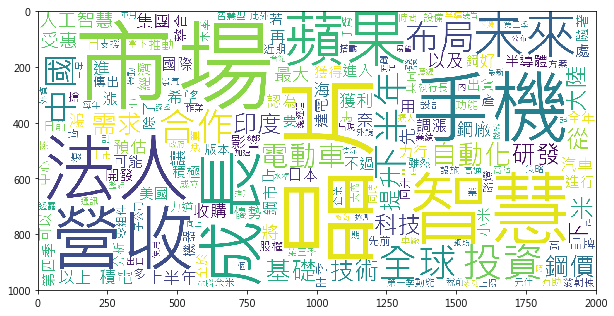

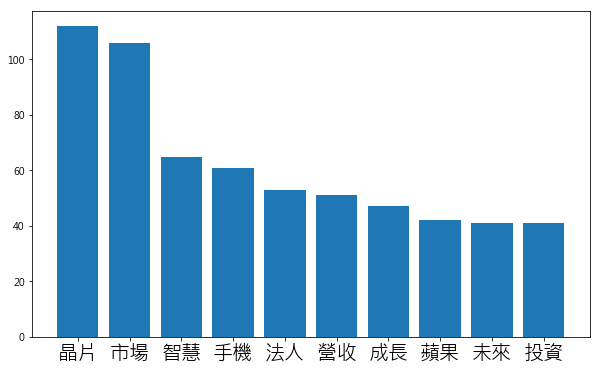

In [3]:
normal_stock()

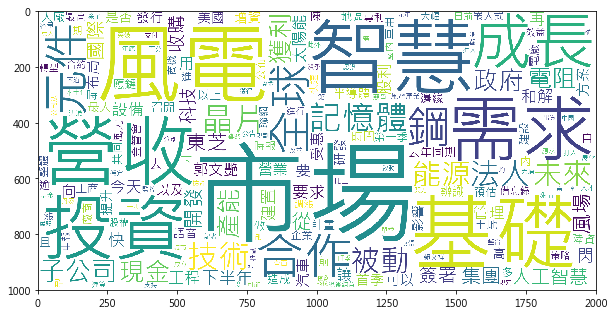

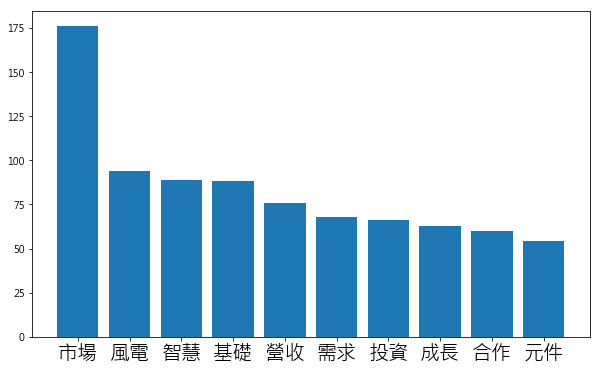

In [4]:
not_normal_stock()

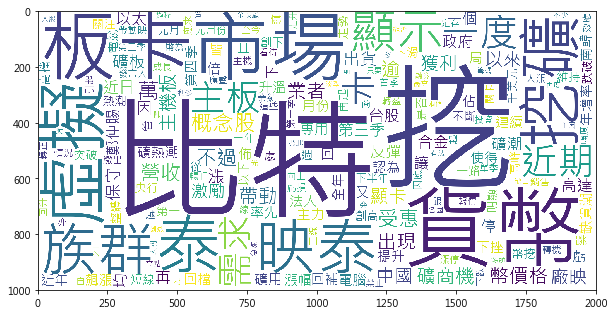

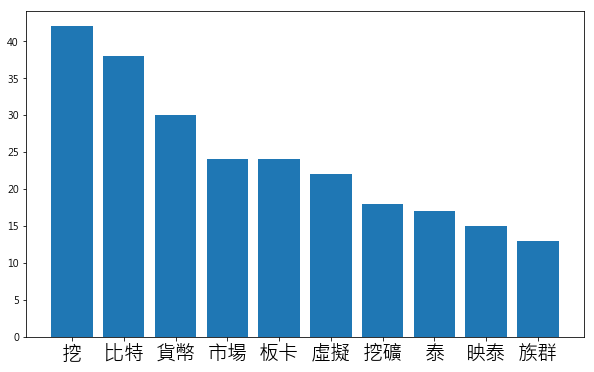

In [5]:
new_not_normal_stock()

### 從 jiebaWordDict.txt 加上 jieba 字典 

In [6]:
addJiebaWordDic("jiebaWordDict.txt")

###  init 四個 array 為之後的 dataframe做準備
- fileName -> 檔案名稱
- corpus -> 文章內容被結巴斷詞後的結果
- company -> 文章所屬的公司
- stockType -> 是常規股還是妖股

In [7]:
fileName = []
corpus = []
company = []
stockType = []

### 加上常規股的所有文件

In [8]:
for file in glob.glob(r'常規股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "聯發科" in name:
        company.append("聯發科")
    elif "台積電" in name:
        company.append("台積電")
    elif "台達電" in name:
        company.append("台達電")
    elif "鴻海" in name:
        company.append("鴻海")
    elif "中鋼" in name:
        company.append("中鋼")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("常規股")
    
    print(name)
    print(file_token)


20180822聯發科.txt
['一步', '三', '三足鼎立', '事業調', '以及', '優化', '入', '內部', '兩項', '再度', '前台', '劃分', '力行', '加入', '半導', '半導體', '半導體', '半導體', '即', '原經', '另將', '召開', '召開', '國際', '團隊', '團隊並', '執行長', '大事', '奕力', '娛樂事業', '子公司', '子公司', '子公司', '家庭', '將成', '成立', '控相關', '推動', '擔任', '改組', '整案', '整除', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晶片', '晶片', '智能', '智能', '會將', '會達成', '月份', '業群', '機上', '正式', '決議', '為進', '營團', '產品轉', '盒', '研發', '科代', '科分', '科技', '科技', '移至', '移轉', '積電大將', '第一', '第一次', '第三', '第二', '簡易合', '納為', '組織', '組織調', '群', '群即', '群及', '群未來', '群無線', '群經過', '群聯', '落實', '蔡', '訊息', '記者', '調整', '請', '這次', '通訊', '邀', '重新', '重新', '重組', '隊將', '集團', '集團', '集團資', '電視', '電視', '電視', '預計明', '體觸']
20180629聯發科.txt
['下', '下', '下', '下首', '並且', '並鎖定', '中階產品', '主力', '之一', '之外', '之際', '乘勝', '交貨', '人員', '人員', '人員', '人士', '以來', '企圖', '企圖心', '傳出', '傳奪', '價業界', '充電', '全球', '全球', '兩大', '具體', '再', '再力', '前', '前往', '前往', '化', '北美', '北美', '北美', '北美', '北美', '北美', '博通', '卡位', '又', '可以', '合作', '品牌', '商透過', '單且', '單氣勢', 

20170311台達電.txt
['一休關', '一例', '一方面', '一方面', '不同', '不錯', '中國', '主為', '亞洲', '仍須', '他舉', '做生意', '公室', '分享', '分享', '分別', '分析', '力道', '動能', '參加', '參展', '回', '回', '回來', '執行長', '基礎', '基礎', '報酬', '大產品', '封閉', '將是', '專門', '工具', '工具', '工具', '布局', '布局', '底特律', '很多', '得出', '得到', '得到', '復', '復', '悲觀', '悲觀', '感受', '感想', '感覺', '成長', '成長', '抽象', '日本', '時間', '景氣', '景氣', '景氣', '景氣', '景氣', '景氣', '景氣', '智能', '最多', '未來', '機展', '機是', '機是', '歐洲', '此', '比例', '汽車', '沒有', '沒有', '海', '海', '率', '生活', '相', '看法', '看起', '積極', '綠', '繫', '缺工', '美國大車', '群營收', '習慣', '而言', '聯', '能源管理', '能源管理', '能源管理', '能源管理', '號台', '覺得', '訊', '設定', '設立', '認為', '購', '起來', '起碼', '起碼', '車廠', '車廠', '車廠', '辦', '這', '還不錯', '鄭平', '雖態度', '雖然', '難', '零組件', '電子海', '電成長', '電積極']
20170614台達電.txt
['一旦', '一步', '下同', '不好', '不過', '中台', '中脫穎', '人才', '估年', '做', '億台幣', '億台幣', '儘', '儘', '充電器', '全球', '出', '分析', '創新', '力道', '力道', '加入', '加大', '加大', '千家', '可以', '台達海', '合作', '向', '告', '報酬', '場', '多變', '夥伴', '容易', '將', '小', '工作', '市', '很多', '成長', '手', '打入', '投資',

20180416中鋼.txt
['不僅', '中興達', '亦', '假高雄', '優勢', '先機', '利', '利用', '加速', '占', '土典禮', '地化', '地化', '基礎', '基礎', '基礎', '基礎', '大且', '市場', '建置', '應鏈', '成立', '房動土', '所有', '投資', '拓銷', '推動', '推動', '提升', '日前', '暨', '本土', '機組項', '海基', '海基', '海洋', '產業供', '用', '目中屬', '禮以', '第一家', '結盟典', '總', '翁朝棟', '興達', '興達', '興達港', '舉行', '舉辦動', '設施', '鋼材', '鋼量', '鋼鐵產業', '鏈', '鏈', '需求', '風場', '風電', '風電', '高', '高品質']
20180409中鋼.txt
['一旦', '一週', '三大', '下降', '不容', '且', '且', '中鋼構', '二季', '五大', '五天', '亮眼', '以便', '供需', '依然', '停板', '傳統', '價表現', '內廠', '內銷', '再', '准予', '前向', '前景', '前景', '創新', '半成品', '原料', '原料', '受惠', '受惠', '受惠', '只要', '可樂觀', '台灣輸', '呈', '商採', '商機', '商機', '啟動', '單未來', '國際', '基礎', '基礎', '大量', '大陸', '大陸', '將', '將因', '專區', '專家', '專家', '就近', '展望', '工程', '市場', '平穩', '庫存', '廠商', '建置', '必須', '忽視', '成份', '房大訂', '扁', '手筆', '投資', '接獲', '推動', '推動', '措施', '措施', '提振內', '支撐', '攻上', '放行', '政府', '新廠', '族群', '旺季', '最大', '最大', '最近', '月份', '月底', '有力', '有助', '期待', '期能', '未來', '未來', '板類', '此', '決議', '海洋', '清含', '減少', '減產', '漲', '漲

### 加上妖股的所有文件

In [9]:
for file in glob.glob(r'妖股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "世紀鋼" in name:
        company.append("世紀鋼")
    elif "國巨" in name:
        company.append("國巨")
    elif "大同" in name:
        company.append("大同")
    elif "威盛" in name:
        company.append("威盛")
    elif "旺宏" in name:
        company.append("旺宏")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("妖股")
    
    print(name)
    print(file_token)

2018-02-02 國巨.txt
['一波國', '一致', '上游', '上游', '下午', '不利因素', '不堪', '不易', '中大', '中大', '中華區', '之下', '之外', '二度', '交期', '代表', '以上', '以上', '以及', '以車', '估值', '估波', '估計', '但是', '供給', '做', '偶業界', '傳出', '價行動', '價行動', '億億元', '內文', '全年', '全年', '兩波', '再漲', '分析', '初', '別是', '券商', '力道', '動作', '勢', '匯率', '占', '占', '厚膜', '厚膜', '受到', '台商', '台廠', '品特', '商不多', '啟動', '啟動', '因', '國巨將', '在外', '地區', '均', '坦言', '基板', '基板', '壓力', '多項', '大型', '大型', '大陸', '大雪', '大電', '如何', '將上', '將落', '將針', '對象', '小時', '尺寸', '尺寸', '尺寸', '工商', '工薪', '巨大', '巨年', '已有', '幅度', '廠商', '廠商', '廠廠', '影響', '影響', '從', '從產能', '心理', '挑戰元', '掃貨', '排阻', '接收', '提前', '擅長', '擴大', '擴產', '攀升', '收到', '放量', '政府', '新產能', '日系', '日起', '旺', '旺季', '昆山', '昆山', '時報', '時間', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '替', '最高', '有待', '未來', '材料', '材料', '材料', '條件', '業務', '極大', '正式', '每日', '比約', '法人', '法人', '波漲', '準備', '漲', '漲價', '漲價', '漲價', '漲價', '漲勢國', '漲國', '漲幅', '漲幅國', '漲成國', '無', '無論', '營收', '營收', '獨有', '獲利', '獲利', '理陳佐銘', '產', '產能', '用工', '由國'

2018-02-12 威盛.txt
['一度', '一步', '上周四', '下方', '不僅', '不過', '並持續', '中國', '中期', '交叉', '交易日', '交易日', '人工智慧', '仍持續', '任天堂', '停價位', '前進', '前進', '及邊', '向上', '向上', '向上', '呈', '均', '城市', '報林', '多方', '多頭', '大漲', '大漲', '天期', '如此', '威鋒', '威鋒', '子公司', '宛儀', '市場', '市場', '市場', '布局', '強早', '所在', '打入', '指標', '排列', '控制', '提升', '揚升', '揚升且', '效應', '方案', '日日', '晶片', '智慧', '智慧', '更將', '有利', '有利', '東南亞', '機器', '浮現', '淨值僅', '漲', '盤', '瞄準', '短', '短線', '積極', '線', '緣運算', '股價續', '背夾', '行動式', '視覺', '觸及', '財訊快', '貢獻', '起點', '跨入', '轉型', '轉為', '逐漸', '連續', '連續', '進', '鏈', '隱憂', '集線器', '電視牆', '順勢']
2018-03-14 威盛.txt
['下', '下大單', '不俗', '且', '交所', '人工智慧', '今', '以及', '企業', '佳境', '停', '停鎖', '優異', '元月', '元月', '公告', '公布', '公眾場', '出', '前三季', '前三季', '前三季', '力', '半導體', '可以', '商店', '單月', '單月', '因為', '城市', '多元', '多元化', '大漲', '將機會', '將營運', '嵌入式', '市場', '市場', '市場', '布局', '應證', '成', '成效', '打入', '拚', '拚', '搶', '據悉', '攻上', '政府', '整合', '日前', '日前', '早盤', '時報', '智慧', '智慧', '有利於', '朝向', '未來還', '東南亞', '機器視', '機場', '機關', '浮現', '漲', '漸入', '無人'

2018-04-18 世紀鋼.txt
['三年期', '三項', '上述', '並以', '並號', '中心', '中心', '中心', '主導', '主軸', '主辦', '之中', '交流', '亦', '來訪', '促使', '促進', '內', '內', '公布', '共', '共同', '共同', '別來', '創新', '力量', '動', '協會', '參', '及營運', '召國內', '可達', '合作', '合作', '合作', '合作', '合作', '合家', '合家', '吸引', '吸引', '商來', '商機', '商與業者', '單樁', '國', '國內', '國內', '國際', '國際', '國際', '國際', '國際廠', '國際業者', '園區', '地', '域分', '培育', '基', '基礎', '基礎', '基礎', '基礎', '外業者', '多', '多年', '大聯盟', '媒合', '媒合', '學術', '家', '將攜手', '專業領', '工業局', '工程', '工程', '工程', '市場', '希望', '帶', '帶動', '廠商', '建立', '建立', '建立', '建立', '式', '形成', '應', '應國內', '成果', '成立', '我國', '我國', '手共拓', '投', '投資', '控制', '推動', '推動', '推動', '推動', '推動國', '攜', '政府', '政策', '施工', '會談', '期盼', '本次', '本次', '業', '業', '業者', '業者', '業者', '機', '機構', '機產業', '機零組件', '段', '注入', '海事', '海事', '海事', '海事', '海洋', '海洋', '海洋', '海洋', '深耕', '港生產', '灣離岸', '獲得', '環境', '產值', '由金屬', '當天', '發電產業', '發電產業', '知名', '研究', '研究', '研究', '礎', '科技', '科技', '科技', '科技人才', '範疇', '簡稱', '組成', '經濟部', '總', '聚落', '聯盟', '聯盟', '肯定', '自', '舉行', '船', '船聯', '船舶

2018-04-27 旺宏2.txt
['一個', '上季', '上法', '下半年', '下半年', '下半年', '不會', '中國', '中國', '中國', '中國廠', '之一', '之一', '任天堂', '估計', '低', '低品', '佔', '信心十足', '傳統', '億元季', '億元季', '億元季', '光', '全年', '出', '出新', '出貨', '利益', '動能', '動能', '升高', '半導體', '占', '可維持', '吋', '吋', '品質', '哪', '唯讀', '商沒有', '問題', '因產能', '地位', '型', '型', '型', '報價', '增', '增倍', '增倍', '多', '多車', '大廠', '好', '存備', '存貨', '季', '季減', '季減', '守', '宏', '容量', '容量', '將成', '將持續', '將是', '將比庫', '將用', '將視', '專注', '對手', '對象', '展望', '市場', '廠商', '弱', '必朝', '快', '快', '快', '憶', '應求', '成是', '成長', '成長', '成長', '手', '技術', '持平', '接受', '推', '提高', '支出', '收', '收約', '整體', '新竹', '旺', '旺季', '旺宏到', '旺宏電子', '昨', '昨舉', '是否', '普拉斯', '最高', '有限', '本季', '比率', '比率', '沒有', '沒有', '法人', '洪友芳', '淡季', '淡季', '減少', '減年', '減年', '減年', '滿載', '滿載', '滿載', '營', '營收', '營收', '營業', '產品線', '產能', '產能', '產能', '產能', '產能', '用產品', '盈餘元', '相對持', '看來', '看漲', '科技', '稅後盈餘', '穩', '穩', '穩定', '穩營', '競爭', '競爭', '競爭', '第', '第季合', '編碼', '總', '總出', '美', '而言', '能維', '與賽', '萬片', '萬片', '行線', '規劃', '記', '記憶體', '記憶體', 

2018-05-22 大同.txt
['三年', '三年', '上述', '且', '且', '之處', '了解', '了解', '事項', '事項', '五', '五大', '五大', '交法', '交法', '交法', '什麼', '依發', '依發', '停止', '停止', '停止', '停止', '停止', '價證券', '價證券', '億元案', '億元案', '億股', '億股', '償', '充分', '充分', '內因', '內因', '內容', '內容', '公司法', '公司法', '公告', '公告', '公告', '判決', '判決', '判決', '前', '前年', '募發', '募發', '募集', '募集', '原本', '原銀行', '可以', '可以', '問題', '問題', '問題', '因申', '均', '增資', '增資', '增資', '增資後資金', '增資案', '增資金額', '大事', '如何', '如華映', '如華映', '子公司', '子公司', '子公司', '子公司', '官員', '官員', '實質', '實質', '實質', '實質', '實質', '將請', '尚未', '情事', '情事', '情況', '情況', '情況', '情況', '情況', '應行', '應行', '控管', '提出', '提出', '擔任', '擔任', '擔任', '據', '據', '改善', '改善', '改善', '放行', '效益', '效益', '新股', '新股', '明後沒有', '昨天', '昨天', '是否', '是否', '是否', '是否', '是否', '是否', '暫停', '書件', '書件', '最近', '最近', '有罪', '有罪', '有關', '有關', '條款', '條款', '決定', '法院', '法院', '涉及', '涉及', '涉及', '涉案', '清楚', '無達', '現任', '現任', '現任', '現任', '現增案', '現增案', '現金', '現金', '理由', '理由', '生效', '生效', '生效', '生效', '生效', '生效', '生效日', '生效日', '用', '用途', '用途', '申報', '申報', '申報',

In [10]:
new_fileName = []
new_corpus = []
new_company = []
new_stockType = []

In [11]:
for file in glob.glob(r'映泰/*.txt'):
    name = os.path.basename(file)
    new_fileName.append(name)
    new_company.append("映泰")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    new_corpus.append(file_token_all)
    new_stockType.append("妖股")
    
    print(name)
    print(file_token)

20180228.txt
['一路', '下挫', '且', '中題', '乾淨台', '使用率', '光', '兩個', '再', '券資', '前', '副', '創下', '劇烈', '卡', '反彈', '召開', '台股', '台股', '台股', '台股', '回補', '回補', '回補', '回補', '多頭', '奕', '套牢', '市場', '幣挖', '得', '急', '急漲', '投顧', '挑選', '掀起', '搭配', '族群', '更是', '有映', '有望', '材', '杜富蓉', '概念股', '檔', '每年', '比特', '比高', '法人', '泰為', '清洗', '焦點', '熱絡', '相當', '短線', '礦', '穩定', '突破', '第一', '第三', '籌碼', '籌碼', '總', '缺口', '缺口', '股有', '股相當', '股處', '能否', '融券', '融券', '行情', '認為', '資深', '賣壓', '跌千點', '跳空', '軋空', '軌道', '近期', '近期', '進入', '過程', '選對個', '金投顧', '關注', '陳', '面臨', '顯示', '顯示', '高檔', '高點', '點的']
20180112-1.txt
['一美國', '不斷', '中國', '之上', '以來', '停', '停', '優缺資', '分析', '利多', '創下', '南', '卡', '只要', '可圈', '可點', '各國', '各異然', '回', '圖卡', '均線', '外資', '多國', '大量', '央行', '央行', '央行', '市場', '師也', '幣價格', '幣挖', '幣題', '成交量', '我國', '所有', '挾題', '攻漲', '數位', '族群', '日增', '映泰', '材', '材不退', '比特', '比特', '比特', '泰', '泰攻', '深產業', '漲', '焦點映', '熱潮', '營收', '營運持', '爆量', '研究', '礦熱多國', '站', '維持', '續樂', '萬張', '著手', '虛擬', '虛擬', '褒', '觀映', '認為', '貨幣', '貨幣', '貨幣

20180125.txt
['一季', '一路', '上揚', '下', '主板', '主板', '主板', '主板', '之際拉', '亦', '亦持', '以來', '以來', '以太', '使得', '全', '全年', '再', '出貨', '出貨', '利多消息', '利益', '卡通', '又', '受惠', '受惠', '受惠', '受缺', '同期', '單季', '單季', '回溫', '因供', '報價', '多樂觀', '守住', '將愈來', '展望', '市場', '市場', '市場', '市業者', '市況', '布局', '帶動', '帶動', '帶動', '幣價格', '年增率', '強化', '從', '情況', '愈', '應求', '應聲', '成法', '技嘉', '抬', '抬', '挖', '挖', '挖礦', '挖礦', '掃貨潮', '提前', '提升', '換機潮', '效應', '整體', '新一代', '日前', '旺到', '明顯', '映泰', '映泰', '昨相關', '暢旺', '有優', '未止', '板卡', '業者', '概念股', '概念股', '正數外', '正面', '泰', '浮現', '淨', '漲', '漲勢', '漲幅', '漲映', '營收', '獲利表現', '率及', '現拉', '發表其', '皆', '盤', '看法', '礦主機板', '礦板', '礦潮', '第三季', '第二', '第二季', '第四季', '第四季', '翻漲', '自', '自', '自', '萬片', '葉培城', '著紅', '處', '解零組件', '認為', '貨難', '起', '起', '起營業', '起積極', '跟', '路', '轉正', '近年', '通通', '逾', '逾', '釋出', '重新', '間接', '除能', '陸續', '雙雙', '雙雙', '需求', '順利', '預估', '顯卡', '顯卡廠', '顯示', '飆升', '首季', '高階處']
20180301-1.txt
['一個', '一定', '一月份', '一點', '三分之二', '三四', '上周', '不輸', '主流', '主流', '以上', '停', '傳聞', '出', '包產能

### 把四個array加到news的dict後再把它變成news_df的dataframe

In [12]:
news = {}
news["fileName"] = fileName
news["company"] = company
news["corpus"] = corpus
news["stockType"] = stockType

In [13]:
news_df = pd.DataFrame(news)

In [14]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [15]:
new_news = {}
new_news["fileName"] = new_fileName
new_news["company"] = new_company
new_news["corpus"] = new_corpus
new_news["stockType"] = new_stockType

In [16]:
new_news_df = pd.DataFrame(new_news)

In [17]:
new_news_df

,fileName,company,corpus,stockType
0,20180228.txt,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...,妖股
1,20180112-1.txt,映泰,一美國 不斷 中國 之上 以來 停 停 優缺資 分析 利多 創下 南 卡 只要 可圈 可點 ...,妖股
2,20171211.txt,映泰,一度 一路 上月底 下滑 不少 不弱映 不過 中旬 主因 主戰場 之下 之前 五日 仍然 仍...,妖股
3,20180301.txt,映泰,一家 一度 一度 一日 三個 三市 三年 上半年 上季 下半年 下半年 下滑 不過 中國大陸...,妖股
4,20180305.txt,映泰,三年 上升 上漲 下半年 不同 不過 主 主力 主板 主機 主機板 今年初 仍為 以來 以系...,妖股
5,20180112.txt,映泰,且 主機板 也強 令主機 但現 俱 價量 兩大動 出現 動能將 卡 卡 卡運算 原料 原料 ...,妖股
6,20180306.txt,映泰,一同 三星 三星 下 下 不斷 不斷 交投 亮眼 使 停 傳 價彈 光 全球 再度 列 升 ...,妖股
7,20180104.txt,映泰,一定 一度 一波 不好 不過 不過 中國 中國 乃 之上 之勢 之外 之後回 二線 交易所 ...,妖股
8,20180111.txt,映泰,一度 下跌 主因 亦 亮燈 以及 休兵 停 價勢 優 全面 再起 創高 創高因 四日 增 多...,妖股
9,20171208-1.txt,映泰,一個 一個 下 不會 中華電信 主機 主機 兩個 再有 出貨 出貨 前季 努力 卡固態 又 ...,妖股


## TF-IDF

### 從new_df的corpus建立tfidf矩陣

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(news_df.corpus)

In [19]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  9104


In [20]:
print("tfidf.shape: ", tfidf.shape)

tfidf.shape:  (200, 9104)


### 找出所有文件中tf-idf>0.3的字

In [21]:
### check each document
for i in range(len(corpus)):
    print('----Document {%d} %s ----'%(i+1,news_df.fileName[i]))
    for j in range(len(words)):
        if tfidf[i,j] > 0.3:
              print(words[j], tfidf[i,j], i ,j)

----Document {1} 20180822聯發科.txt ----
晨星 0.6790499177391536 0 4445
----Document {2} 20180629聯發科.txt ----
北美 0.36937960585618257 1 1582
----Document {3} 20180109聯發科.txt ----
功能 0.3043121845059486 2 1519
----Document {4} 20180410聯發科.txt ----
----Document {5} 20180426聯發科.txt ----
----Document {6} 20180412聯發科.txt ----
力行 0.3715737668973653 5 1514
手機 0.31685287598969786 5 3687
----Document {7} 20171031聯發科.txt ----
蘋果 0.3060681556164694 6 7032
----Document {8} 20180524聯發科.txt ----
----Document {9} 20180228聯發科.txt ----
冠州 0.4268585663881932 8 1308
----Document {10} 20180111聯發科.txt ----
阿里巴巴 0.43462442434082754 9 8460
----Document {11} 20180129聯發科.txt ----
晶片 0.3551229271063963 10 4467
音箱 0.4201484008648034 10 8775
----Document {12} 20170208聯發科.txt ----
----Document {13} 20180302聯發科.txt ----
野村 0.3490683589370701 12 8221
----Document {14} 20180418聯發科.txt ----
----Document {15} 20180315聯發科.txt ----
----Document {16} 20180319聯發科.txt ----
----Document {17} 20171207聯發科.txt ----
作業 0.43856189596526

語鏡 0.3760322078826375 125 7304
----Document {127} 2018-06-03 威盛.txt ----
切入 0.32031654845900465 126 1380
----Document {128} 2018-02-12 威盛.txt ----
----Document {129} 2018-03-14 威盛.txt ----
----Document {130} 2018-06-01 威盛.txt ----
業務 0.3817045785508101 129 4829
網與 0.31291490450723436 129 6531
----Document {131} 2018-05-31 威盛2.txt ----
助理 0.3537842982260207 130 1544
語音 0.4415354999567521 130 7306
----Document {132} 2018-05-14 威盛.txt ----
汽車 0.4406925334655397 131 5109
----Document {133} 2018-06-08 威盛.txt ----
語鏡 0.3760322078826375 132 7304
----Document {134} 2018-05-11 威盛.txt ----
駕駛 0.3627289356361259 133 8926
----Document {135} 2018-03-27 威盛.txt ----
宏碁 0.4697051884598074 134 2767
----Document {136} 2018-04-23 威盛.txt ----
無線 0.41342499100136315 135 5415
----Document {137} 2018-05-29 威盛.txt ----
----Document {138} 2018-02-05 威盛.txt ----
----Document {139} 2018-02-27 威盛.txt ----
物辨識 0.3230717056406865 138 5510
----Document {140} 2018-05-31 威盛.txt ----
統訂 0.32968071945617144 139 6462
---

In [22]:
words = vectorizer.get_feature_names()
print('詞語序列:', words)

詞語序列: ['一七三條', '一九三', '一事', '一些', '一代', '一件', '一份', '一休關', '一位', '一來國', '一例', '一個', '一個兆元', '一倍', '一切', '一劑', '一勝', '一半', '一口', '一台', '一同', '一向', '一問', '一塊', '一大', '一大步', '一天', '一套', '一季', '一定', '一席之地', '一年', '一度', '一座', '一廠', '一延', '一成', '一成將', '一敗', '一斑', '一方面', '一旦', '一是', '一業務', '一樣', '一次', '一款', '一步', '一段路', '一波', '一波國', '一流', '一環', '一直', '一看', '一種', '一站', '一站式', '一篇', '一系列', '一組', '一職林', '一股', '一臂之力', '一致', '一舉', '一般', '一艘', '一艘船', '一說', '一負', '一起', '一路', '一路上', '一輛', '一輪', '一週', '一邊', '一開始', '一隊', '一顆', '一體', '一體化', '一點', '七奈', '七奈米', '七年', '七成', '七美', '七股', '三件', '三個', '三倍', '三到', '三千', '三升', '三圓', '三圓圓', '三圓建設', '三地', '三大', '三大業務', '三大產品', '三季', '三家', '三年', '三年期', '三成', '三方', '三日', '三星', '三是', '三期', '三次', '三段', '三率', '三百', '三菱', '三號', '三讀', '三越', '三足鼎立', '三連漲', '三項', '上下', '上下游', '上任', '上元', '上元關', '上升', '上午', '上半年', '上台', '上周', '上周五', '上周四', '上坡路', '上季', '上將', '上導入', '上屆', '上層', '上市', '上市公司', '上揚', '上揚樂觀', '上攻', '上旬', '上會', '上月底', '上法', '上海', '上游', '上演', '上漲', '上為', '上緯', '上緯

In [23]:
tfidf_array = tfidf.toarray()

In [24]:
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05422351, 0.05422351, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


## PCA

In [26]:
from sklearn.decomposition import PCA

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
news_pca = pca.fit_transform(tfidf_array)

# # Inspect the shape
print("Shape of reduced_data_pca:", news_pca.shape)
print("---")
print("PCA:")
print(news_pca)

Shape of reduced_data_pca: (200, 2)
---
PCA:
[[-1.81028728e-02 -5.77150318e-02]
 [-7.73429909e-02 -1.07673558e-01]
 [-1.14851991e-01 -1.30428792e-01]
 [-8.48027988e-02 -1.11672470e-02]
 [-4.04541836e-02 -1.75016086e-01]
 [-1.07777598e-01 -8.61622261e-02]
 [-4.21527794e-02 -4.41172926e-02]
 [-1.19423293e-01 -1.58518272e-01]
 [-7.17879595e-02 -2.00223918e-01]
 [-4.02578660e-02 -2.82189775e-01]
 [-1.00022947e-01 -2.26062688e-01]
 [-5.56025362e-02 -9.22946142e-02]
 [-8.10762551e-02 -9.22055587e-02]
 [-1.18463116e-01  3.49810438e-03]
 [-5.47246737e-02 -1.86226690e-01]
 [-1.30970541e-01 -9.65477997e-02]
 [-6.66134512e-02 -9.13045647e-02]
 [-8.56643443e-02  1.53805125e-02]
 [-9.26571592e-02  6.74378457e-02]
 [-5.72463550e-02 -1.14923292e-01]
 [-4.38582971e-02 -1.31258560e-01]
 [-2.06879560e-02 -5.35381092e-02]
 [-5.93492868e-02  2.91908691e-02]
 [ 6.30305799e-02 -1.00360809e-02]
 [-1.06253952e-01  1.80202240e-01]
 [ 6.24313341e-03 -5.42539804e-02]
 [-8.69584499e-03 -6.89321788e-02]
 [-2.16169

### 畫出常規股和妖股在降維後的PCA的圖

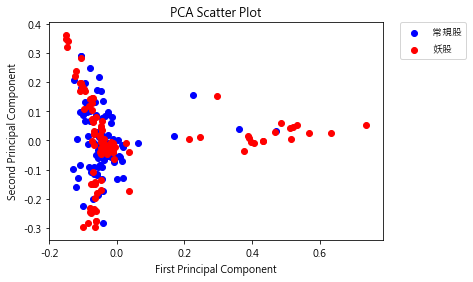

In [27]:
colors = ['blue', 'red']
stockType = ["常規股", "妖股"]
for i in range(len(colors)):
    x = news_pca[:, 0][news_df.stockType == stockType[i]]
    y = news_pca[:, 1][news_df.stockType == stockType[i]]
    plt.scatter(x, y, c=colors[i])
plt.legend(stockType , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### 畫出公司在降維後的PCA的圖

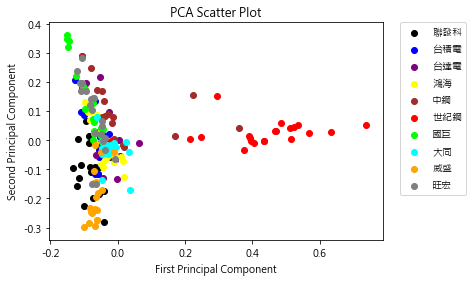

In [28]:
colors = ['black', 'blue', 'purple', 'yellow', 'brown', 'red', 'lime', 'cyan', 'orange', 'gray']
companys = ["聯發科", "台積電", "台達電", "鴻海", "中鋼", "世紀鋼", "國巨", "大同", "威盛", "旺宏"]
for i in range(len(colors)):
    x = news_pca[:, 0][news_df.company == companys[i]]
    y = news_pca[:, 1][news_df.company == companys[i]]
    plt.scatter(x, y, c=colors[i])
plt.legend(companys , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

## 利用tfidf作為訓練資料，實作K-Means與SVM分類 常規股和妖股

In [29]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(tfidf_array, news_df.stockType, test_size=0.25, random_state=42)

In [30]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

print(n_digits)

# Inspect `y_train`
print(len(y_train))

150
9104
2
150


In [31]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
y_train

114     妖股
173     妖股
5      常規股
126     妖股
117     妖股
73     常規股
140     妖股
98     常規股
172     妖股
96     常規股
169     妖股
97     常規股
31     常規股
12     常規股
35     常規股
119     妖股
42     常規股
189     妖股
90     常規股
136     妖股
51     常規股
127     妖股
162     妖股
41     常規股
118     妖股
113     妖股
26     常規股
139     妖股
100     妖股
111     妖股
      ... 
48     常規股
88     常規股
21     常規股
57     常規股
160     妖股
192     妖股
129     妖股
37     常規股
157     妖股
193     妖股
1      常規股
52     常規股
149     妖股
130     妖股
151     妖股
103     妖股
99     常規股
116     妖股
87     常規股
74     常規股
121     妖股
199     妖股
20     常規股
188     妖股
71     常規股
106     妖股
14     常規股
92     常規股
179     妖股
102     妖股
Name: stockType, Length: 150, dtype: object

In [34]:
y_test

95     常規股
15     常規股
30     常規股
158     妖股
128     妖股
115     妖股
69     常規股
170     妖股
174     妖股
45     常規股
66     常規股
182     妖股
165     妖股
78     常規股
186     妖股
177     妖股
56     常規股
152     妖股
82     常規股
68     常規股
124     妖股
16     常規股
148     妖股
93     常規股
65     常規股
60     常規股
84     常規股
67     常規股
125     妖股
132     妖股
9      常規股
18     常規股
55     常規股
75     常規股
150     妖股
104     妖股
135     妖股
137     妖股
164     妖股
76     常規股
79     常規股
197     妖股
38     常規股
24     常規股
122     妖股
195     妖股
29     常規股
19     常規股
143     妖股
86     常規股
Name: stockType, dtype: object

### K-Means 分類 常規股和妖股

In [35]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=2, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [36]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)

# Study the shape of the cluster centers
clf.cluster_centers_.shape

predict 結果
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1]
---實際上---
變為01
[1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1]
正確
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']


(2, 9104)

In [37]:
print(clf.cluster_centers_)

[[ 5.89386002e-04  5.89386002e-04  0.00000000e+00 ...  7.45368331e-04
   6.85803494e-04  1.20330525e-03]
 [-5.42101086e-20 -5.42101086e-20  0.00000000e+00 ... -6.50521303e-19
  -4.87890978e-19  5.42101086e-19]]


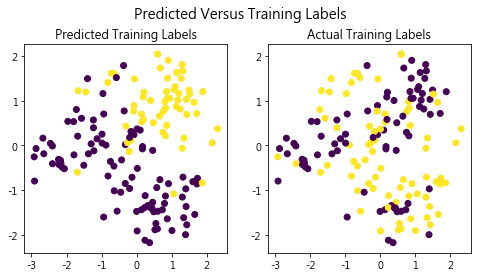

In [38]:
# 載入 `Isomap()`
from sklearn.manifold import Isomap

# 使用 Isomap 對 `X_train` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

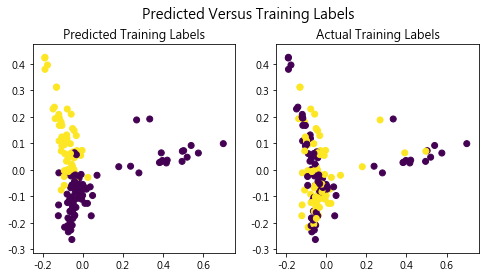

In [39]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 對 `X_train` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [40]:
# Import `metrics` from `sklearn`
from sklearn import metrics

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)


# Print out the confusion matrix with `confusion_matrix()`
print("\n正確與錯誤的metrics")
print(metrics.confusion_matrix(pd.Categorical(y_test).codes, y_pred))

predict 結果
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1]
---實際上---
變為01
[1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1]
正確
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']

正確與錯誤的metrics
[[19  4]
 [18  9]]


### SVM 分類 常規股和妖股

In [41]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

1.0

In [42]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']


In [43]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

          妖股       1.00      1.00      1.00        23
         常規股       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[23  0]
 [ 0 27]]


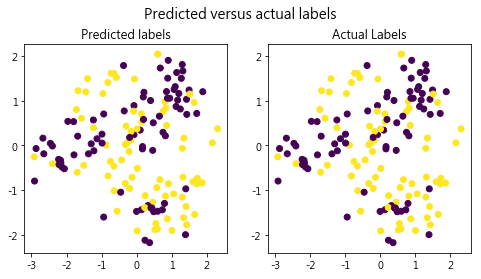

In [44]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

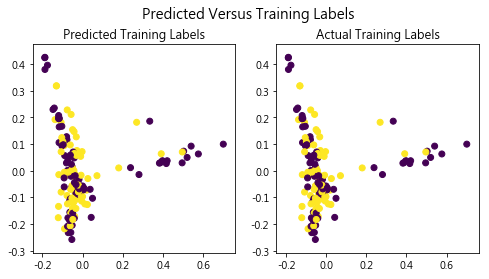

In [45]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

## 利用tfidf作為訓練資料，實作K-Means與SVM分類 公司

In [46]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(tfidf_array, news_df.company, test_size=0.25, random_state=42)

In [47]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

print(n_digits)

# Inspect `y_train`
print(len(y_train))

150
9104
10
150


In [48]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y_train

114     國巨
173     旺宏
5      聯發科
126     威盛
117     國巨
73     台積電
140    世紀鋼
98      鴻海
172     旺宏
96      鴻海
169     旺宏
97      鴻海
31     台達電
12     聯發科
35     台達電
119     國巨
42      中鋼
189     大同
90      鴻海
136     威盛
51      中鋼
127     威盛
162     旺宏
41      中鋼
118     國巨
113     國巨
26     台達電
139     威盛
100     國巨
111     國巨
      ... 
48      中鋼
88      鴻海
21     台達電
57      中鋼
160     旺宏
192     大同
129     威盛
37     台達電
157    世紀鋼
193     大同
1      聯發科
52      中鋼
149    世紀鋼
130     威盛
151    世紀鋼
103     國巨
99      鴻海
116     國巨
87      鴻海
74     台積電
121     威盛
199     大同
20     台達電
188     大同
71     台積電
106     國巨
14     聯發科
92      鴻海
179     旺宏
102     國巨
Name: company, Length: 150, dtype: object

In [51]:
y_test

95      鴻海
15     聯發科
30     台達電
158    世紀鋼
128     威盛
115     國巨
69     台積電
170     旺宏
174     旺宏
45      中鋼
66     台積電
182     大同
165     旺宏
78     台積電
186     大同
177     旺宏
56      中鋼
152    世紀鋼
82      鴻海
68     台積電
124     威盛
16     聯發科
148    世紀鋼
93      鴻海
65     台積電
60     台積電
84      鴻海
67     台積電
125     威盛
132     威盛
9      聯發科
18     聯發科
55      中鋼
75     台積電
150    世紀鋼
104     國巨
135     威盛
137     威盛
164     旺宏
76     台積電
79     台積電
197     大同
38     台達電
24     台達電
122     威盛
195     大同
29     台達電
19     聯發科
143    世紀鋼
86      鴻海
Name: company, dtype: object

### K-Means 分類 公司

In [52]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [53]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)

# Study the shape of the cluster centers
clf.cluster_centers_.shape

predict 結果
[8 1 7 6 1 9 1 1 5 1 5 8 5 1 8 5 5 6 1 5 5 1 6 1 1 1 5 1 1 1 1 5 2 5 6 5 1
 1 1 1 5 8 7 5 4 8 5 1 6 5]
---實際上---
變為01
[9 8 3 0 6 4 2 7 7 1 2 5 7 2 5 7 1 0 9 2 6 8 0 9 2 2 9 2 6 6 8 8 1 2 0 4 6
 6 7 2 2 5 3 3 6 5 3 8 0 9]
正確
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']


(10, 9104)

In [54]:
print(clf.cluster_centers_)

[[-5.42101086e-20 -5.42101086e-20  0.00000000e+00 ...  0.00000000e+00
  -5.42101086e-20  0.00000000e+00]
 [-5.42101086e-20 -5.42101086e-20  0.00000000e+00 ...  0.00000000e+00
  -1.62630326e-19 -2.16840434e-19]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.08420217e-19 -1.08420217e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -1.08420217e-19]
 [ 3.18961836e-03  3.18961836e-03  0.00000000e+00 ...  0.00000000e+00
   3.71140714e-03 -2.16840434e-19]
 [-5.42101086e-20 -5.42101086e-20  0.00000000e+00 ...  6.85738864e-03
  -5.42101086e-20  0.00000000e+00]]


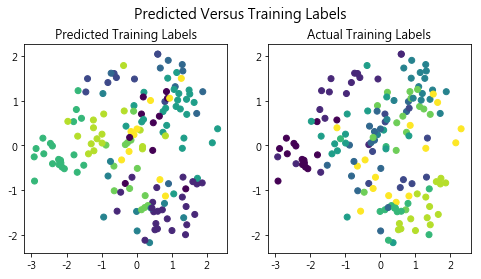

In [55]:
# 載入 `Isomap()`
from sklearn.manifold import Isomap

# 使用 Isomap 對 `X_train` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

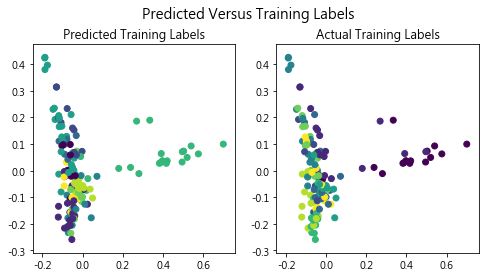

In [56]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 對 `X_train` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [57]:
# Import `metrics` from `sklearn`
from sklearn import metrics

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)


# Print out the confusion matrix with `confusion_matrix()`
print("\n正確與錯誤的metrics")
print(metrics.confusion_matrix(pd.Categorical(y_test).codes, y_pred))

predict 結果
[8 1 7 6 1 9 1 1 5 1 5 8 5 1 8 5 5 6 1 5 5 1 6 1 1 1 5 1 1 1 1 5 2 5 6 5 1
 1 1 1 5 8 7 5 4 8 5 1 6 5]
---實際上---
變為01
[9 8 3 0 6 4 2 7 7 1 2 5 7 2 5 7 1 0 9 2 6 8 0 9 2 2 9 2 6 6 8 8 1 2 0 4 6
 6 7 2 2 5 3 3 6 5 3 8 0 9]
正確
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']

正確與錯誤的metrics
[[0 0 0 0 0 0 5 0 0 0]
 [0 1 1 0 0 1 0 0 0 0]
 [0 6 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 2 0 2 0 0]
 [0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 4 0]
 [0 5 0 0 1 1 0 0 0 0]
 [0 2 0 0 0 3 0 0 0 0]
 [0 4 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 2 0 0 1 0]]


### SVM 分類 公司

In [58]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

0.82

In [59]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台達電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台達電' '大同' '旺宏' '中鋼' '世紀鋼' '台達電' '旺宏' '威盛' '聯發科' '世紀鋼' '鴻海' '鴻海' '聯發科'
 '鴻海' '台積電' '威盛' '威盛' '威盛' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '旺宏' '大同' '台達電' '台達電' '威盛' '大同' '中鋼' '聯發科' '世紀鋼' '鴻海']
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']


In [60]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         世紀鋼       1.00      1.00      1.00         5
          中鋼       0.75      1.00      0.86         3
         台積電       1.00      0.40      0.57        10
         台達電       0.50      0.75      0.60         4
          國巨       1.00      1.00      1.00         2
          大同       1.00      1.00      1.00         4
          威盛       0.88      1.00      0.93         7
          旺宏       0.71      1.00      0.83         5
         聯發科       0.80      0.80      0.80         5
          鴻海       0.80      0.80      0.80         5

   micro avg       0.82      0.82      0.82        50
   macro avg       0.84      0.88      0.84        50
weighted avg       0.86      0.82      0.81        50

[[5 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 4 2 0 0 0 2 1 1]
 [0 1 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 1 0 4 0]
 [0 0 0 1 0 0 0 0 0 4]]


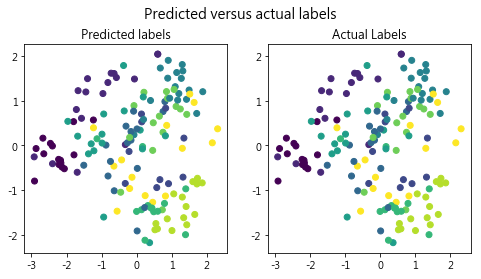

In [61]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

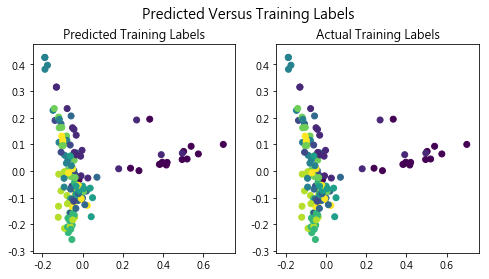

In [62]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

## train跟test切一半(train: 100, test: 100) 跑SVM分類妖股常規股

In [63]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(tfidf_array, news_df.stockType, test_size=0.5, random_state=42)

In [64]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

print(n_digits)

# Inspect `y_train`
print(len(y_train))

100
9104
2
100


In [65]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

0.91

In [66]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '妖股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股' '常規股'
 '妖股' '常規股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '常規股' '妖股' '妖股' '常規股' '妖股'
 '妖股' '妖股' '常規股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '常規股' '常規股'
 '妖股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股']
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股' '常規股'
 '妖股' '常規股' '妖股' '常規股' '妖股' '常規股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '妖股'
 

In [67]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

          妖股       0.93      0.88      0.91        49
         常規股       0.89      0.94      0.91        51

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

[[43  6]
 [ 3 48]]


## 建立一個新的tfidf矩陣加入映泰的字

In [68]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [69]:
new_news_df

,fileName,company,corpus,stockType
0,20180228.txt,映泰,一路 下挫 且 中題 乾淨台 使用率 光 兩個 再 券資 前 副 創下 劇烈 卡 反彈 召開...,妖股
1,20180112-1.txt,映泰,一美國 不斷 中國 之上 以來 停 停 優缺資 分析 利多 創下 南 卡 只要 可圈 可點 ...,妖股
2,20171211.txt,映泰,一度 一路 上月底 下滑 不少 不弱映 不過 中旬 主因 主戰場 之下 之前 五日 仍然 仍...,妖股
3,20180301.txt,映泰,一家 一度 一度 一日 三個 三市 三年 上半年 上季 下半年 下半年 下滑 不過 中國大陸...,妖股
4,20180305.txt,映泰,三年 上升 上漲 下半年 不同 不過 主 主力 主板 主機 主機板 今年初 仍為 以來 以系...,妖股
5,20180112.txt,映泰,且 主機板 也強 令主機 但現 俱 價量 兩大動 出現 動能將 卡 卡 卡運算 原料 原料 ...,妖股
6,20180306.txt,映泰,一同 三星 三星 下 下 不斷 不斷 交投 亮眼 使 停 傳 價彈 光 全球 再度 列 升 ...,妖股
7,20180104.txt,映泰,一定 一度 一波 不好 不過 不過 中國 中國 乃 之上 之勢 之外 之後回 二線 交易所 ...,妖股
8,20180111.txt,映泰,一度 下跌 主因 亦 亮燈 以及 休兵 停 價勢 優 全面 再起 創高 創高因 四日 增 多...,妖股
9,20171208-1.txt,映泰,一個 一個 下 不會 中華電信 主機 主機 兩個 再有 出貨 出貨 前季 努力 卡固態 又 ...,妖股


In [70]:
all_news_df = news_df.append(new_news_df, ignore_index=True)
all_news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業調 以及 優化 入 內部 兩項 再度 前台 劃分 力行 加入 半導 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員 人...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻 問...,常規股
3,20180410聯發科.txt,聯發科,下 不斷 中階處 人工智慧 低點 價位 內建 公布 利多消息 功能 功能 助攻 反應 受 受...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中國 中心 之...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 事情 人才 以外 伺服器 但現 佔 使用 ...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 以及 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取消 向 外電 如...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 下 下 下半年 下半年 不僅 中國 中國大陸 中端 中階 中階 中階 中階...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 仍會 代表 ...,常規股
9,20180111聯發科.txt,聯發科,中心 之後聯 互動 人工智慧 人工智慧 人工智能 以天貓 傑 優勢 共同 具有 具有 副 加...,常規股


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf
vectorizer = TfidfVectorizer()
all_news_tfidf = vectorizer.fit_transform(all_news_df.corpus)

In [72]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  9583


In [73]:
print("tfidf.shape: ", all_news_tfidf.shape)

tfidf.shape:  (220, 9583)


### 使用SVM predict 映泰 是否是妖股

In [74]:
X_train = all_news_tfidf.toarray()[:200]
X_test = all_news_tfidf.toarray()[-20:]
y_train = news_df.stockType
y_test = new_news_df.stockType

In [75]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

0.35

In [76]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股'
 '常規股' '常規股' '常規股' '常規股' '妖股' '常規股' '常規股']
['妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '妖股' '妖股' '妖股' '妖股' '妖股' '妖股']


In [77]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

          妖股       1.00      0.35      0.52        20
         常規股       0.00      0.00      0.00         0

   micro avg       0.35      0.35      0.35        20
   macro avg       0.50      0.17      0.26        20
weighted avg       1.00      0.35      0.52        20

[[ 7 13]
 [ 0  0]]


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
